<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/game_theory/Stackelberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**

In [1]:
%%capture 
!pip install jaxopt

In [2]:
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
import jaxopt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial 

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Inverse Function**

In [22]:
def inverse(f):

  def inverse_fn(q):
    
    def closure(p, q):
      return (f(p)-q)**2

    solver = jaxopt.GradientDescent(fun=closure, maxiter=2000)
    res = solver.run(jnp.ones(shape=()), q)
    return res.params

  return inverse_fn

### **Market Demand**

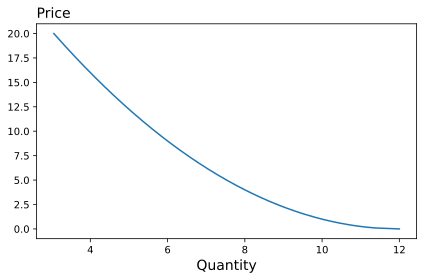

In [40]:
def demand(p):
  return 12 - 2.*p**0.5 
  
ps = jnp.linspace(0, 20, 200)
qs = jax.vmap(demand)(ps)

fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(qs, ps)
plt.title('Price', loc='left', size=14)
plt.xlabel('Quantity', size=14)
fig.savefig('market_demand_firm2.png', format='png')
plt.show()

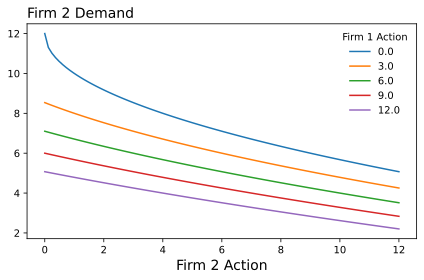

In [41]:
x1s = jnp.linspace(0, 12., 5)
x2s = jnp.linspace(0, 12., 100)
fig = plt.figure(dpi=300, tight_layout=True)
for i in x1s:
  vs = jax.vmap(demand)(x2s + i)
  plt.plot(x2s, vs, label=i)
plt.legend(frameon=False, title='Firm 1 Action')
plt.title('Firm 2 Demand', loc='left', size=14)
plt.xlabel('Firm 2 Action', size=14)
fig.savefig('demand_firm2.png', format='png')
plt.show()

### **Firm Two**

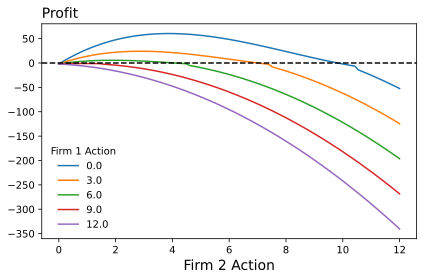

In [42]:
def cost(x2):
  return 2. + 0.1*x2**2 

@jax.jit
def profit(x1, x2):
  return inverse(demand)(x1+x2)*x2 - cost(x2)

x1s = jnp.linspace(0, 12., 5)
x2s = jnp.linspace(0, 12., 100)
fig = plt.figure(dpi=300, tight_layout=True)
for i in x1s:
  vs = jax.vmap(profit, in_axes=(None, 0))(i, x2s)
  plt.plot(x2s, vs, label=i)
plt.axhline(0, linestyle='--', color='black')
plt.legend(frameon=False, title='Firm 1 Action')
plt.title('Profit', loc='left', size=14)
plt.xlabel('Firm 2 Action', size=14)
fig.savefig('objective_firm2.png', format='png')
plt.show()


In [63]:
def optimal_strategy(x1):
  def loss_fn(x2, x1):
    return -profit(x1, x2)
  solver = jaxopt.GradientDescent(fun=loss_fn)
  res = solver.run(jnp.ones(shape=()), x1)
  return jnp.where(profit(x1, res.params) >=0., res.params, 0.)

In [66]:
x1s = jnp.linspace(0, 12., 50)
x2_opt = jax.vmap(optimal_strategy)(x1s)

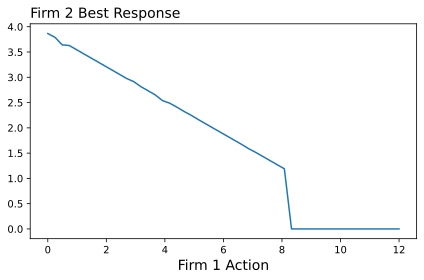

In [67]:
fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(x1s, x2_opt)
plt.title('Firm 2 Best Response', loc='left', size=14)
plt.xlabel('Firm 1 Action', size=14)
fig.savefig('optimal_response_firm2.png', format='png')
plt.show()

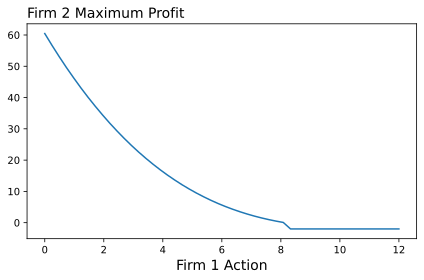

In [69]:
ps = jax.vmap(profit)(x1s, x2_opt)
fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(x1s, ps)
plt.title('Firm 2 Maximum Profit', loc='left', size=14)
plt.xlabel('Firm 1 Action', size=14)
fig.savefig('optimal_profit_firm2.png', format='png')
plt.show()